In [1]:
import os
os.chdir(os.getcwd())
os.getcwd()

'/Users/pantchanit/Documents/Pant_Stat_Asign1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpe
import seaborn as sns
%matplotlib inline

In [3]:
country = pd.read_excel('countries_regions.xlsx')
country.head()

,Country Name,Region,ThirdWorld
0,Afghanistan,South Asia,1
1,Albania,Eastern Europe,0
2,Algeria,Africa,0
3,American Samoa,Australia and Oceanea,0
4,Andorra,Western Europe,0


# GET DATA Broadband

In [4]:
broadband1 = pd.read_excel('infrastructure/broadband.xlsx')
broadband1.replace({'..':np.nan},inplace=True)
broadband1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
broadband1 = country.join(broadband1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
broadband1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,Eastern Europe,0,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,Africa,0,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,Australia and Oceanea,0,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,8.641729,8.657267,8.574859,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,3.758487,4.394125,4.916669,5.309577,6.060718,6.917773,7.580678,7.486892,7.324839,7.312678
214,"Yemen, Rep.",Middle East,1,YEM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,0.457837,0.683606,1.021191,1.316631,1.490685,1.016699,1.325692,1.355607,NaN,NaN
215,Zambia,Africa,1,ZMB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,0.117056,0.103691,0.090088,0.133255,0.147298,0.194238,0.213082,0.416259,0.497681,0.447765


<AxesSubplot:>

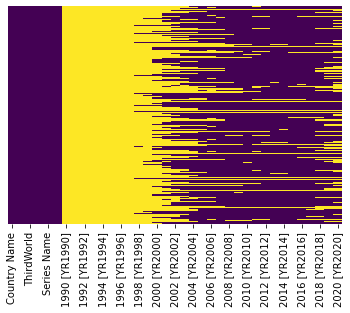

In [6]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
broadband1.drop(['1990 [YR1990]','1991 [YR1991]','1992 [YR1992]','1993 [YR1993]','1994 [YR1994]','1995 [YR1995]','1996 [YR1996]','1997 [YR1997]'],axis=1, inplace=True)
broadband1.head()

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,Eastern Europe,0,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,Africa,0,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,Australia and Oceanea,0,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN


In [11]:
# Removing the outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
#North America 2000 with outliers

In [64]:
broadband1[broadband1.Region=="North America"]["2000 [YR2000]"].describe()

count    5.000000
mean     1.453219
std      2.063312
min      0.013809
25%      0.015167
50%      0.114860
75%      2.509620
max      4.612640
Name: 2000 [YR2000], dtype: float64

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

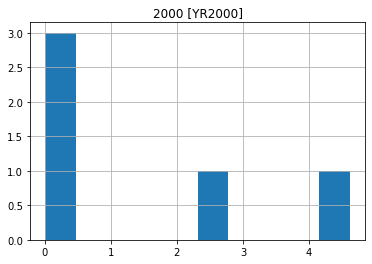

In [65]:
broadband1[broadband1.Region=="North America"].hist(column='2000 [YR2000]')

In [ ]:
#North America 2000 without outliers

In [66]:
NA_broadband_without_2000 = broadband1[broadband1.Region=="North America"]
NA_broadband_without_2000 = NA_broadband_without_2000[["Country Name","Region","2000 [YR2000]"]]
NA_broadband_without_2000

,Country Name,Region,2000 [YR2000]
6,Antigua and Barbuda,North America,NaN
9,Aruba,North America,NaN
13,"Bahamas, The",North America,NaN
16,Barbados,North America,NaN
19,Belize,North America,NaN
21,Bermuda,North America,NaN
27,British Virgin Islands,North America,NaN
35,Canada,North America,4.612640
36,Cayman Islands,North America,NaN
39,Channel Islands,North America,NaN


In [67]:
upper, lower = outliers(NA_broadband_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_broadband_without_2000 = NA_broadband_without_2000[(NA_broadband_without_2000["2000 [YR2000]"] > lower) & (NA_broadband_without_2000["2000 [YR2000]"] < upper)]
NA_broadband_without_2000

Upper whisker:  6.251300319
Lower Whisker:  -3.726513217000001


,Country Name,Region,2000 [YR2000]
35,Canada,North America,4.612640
55,Dominica,North America,0.114860
127,Mexico,North America,0.015167
142,Nicaragua,North America,0.013809
206,United States,North America,2.509620


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

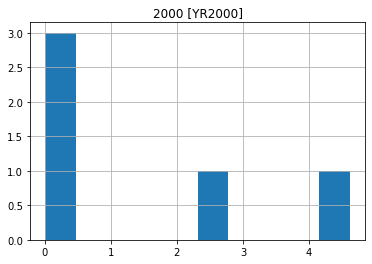

In [69]:
NA_broadband_without_2000.hist()

In [70]:
NA_broadband_without_2000.describe()

,2000 [YR2000]
count,5.000000
mean,1.453219
std,2.063312
min,0.013809
25%,0.015167
50%,0.114860
75%,2.509620
max,4.612640


In [ ]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

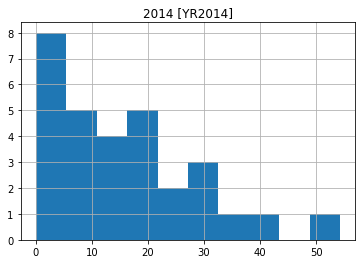

In [71]:
broadband1[broadband1.Region=="North America"].hist(column='2014 [YR2014]')

In [72]:
broadband1[broadband1.Region=="North America"]['2014 [YR2014]'].describe()

count    30.000000
mean     15.743790
std      12.816778
min       0.000000
25%       5.429007
50%      14.345067
75%      21.745043
max      54.239220
Name: 2014 [YR2014], dtype: float64

In [ ]:
#North America 2014 with outliers

In [73]:
NA_broadband_without_2014 = broadband1[broadband1.Region=="North America"]
NA_broadband_without_2014 = NA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,11.618159
9,Aruba,North America,18.501744
13,"Bahamas, The",North America,20.820596
16,Barbados,North America,27.290346
19,Belize,North America,2.801628
21,Bermuda,North America,54.239220
27,British Virgin Islands,North America,22.053193
35,Canada,North America,35.239685
36,Cayman Islands,North America,38.569879
39,Channel Islands,North America,NaN


In [74]:
upper, lower = outliers(NA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_broadband_without_2014 = NA_broadband_without_2014[(NA_broadband_without_2014["2014 [YR2014]"] > lower) & (NA_broadband_without_2014["2014 [YR2014]"] < upper)]
NA_broadband_without_2014

Upper whisker:  46.21909846025
Lower Whisker:  -19.04504817375


,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,11.618159
9,Aruba,North America,18.501744
13,"Bahamas, The",North America,20.820596
16,Barbados,North America,27.290346
19,Belize,North America,2.801628
27,British Virgin Islands,North America,22.053193
35,Canada,North America,35.239685
36,Cayman Islands,North America,38.569879
46,Costa Rica,North America,10.767349
49,Cuba,North America,0.068922


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

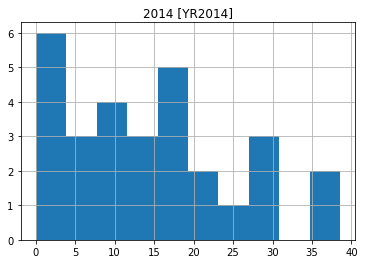

In [75]:
NA_broadband_without_2014.hist()

In [76]:
NA_broadband_without_2014.describe()

,2014 [YR2014]
count,29.000000
mean,14.416361
std,10.741817
min,0.000000
25%,5.271189
50%,13.518156
75%,20.820596
max,38.569879


In [ ]:
#South America 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

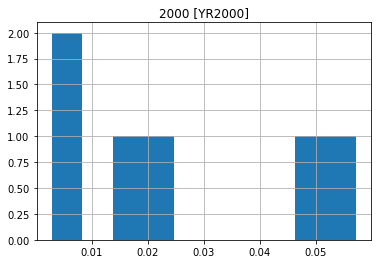

In [77]:
broadband1[broadband1.Region=="South America"].hist(column='2000 [YR2000]')

In [ ]:
#South America 2000 without outliers

In [85]:
SA_broadband_without_2000 = broadband1[broadband1.Region=="South America"]
SA_broadband_without_2000 = SA_broadband_without_2000[["Country Name","Region","2000 [YR2000]"]]
SA_broadband_without_2000

,Country Name,Region,2000 [YR2000]
7,Argentina,South America,NaN
23,Bolivia,South America,NaN
26,Brazil,South America,0.057211
40,Chile,South America,0.050058
42,Colombia,South America,0.022387
57,Ecuador,South America,NaN
83,Guyana,South America,NaN
153,Paraguay,South America,0.002818
154,Peru,South America,0.004074
186,Suriname,South America,NaN


In [86]:
upper, lower = outliers(SA_broadband_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_broadband_without_2000 = SA_broadband_without_2000[(SA_broadband_without_2000["2000 [YR2000]"] > lower) & (SA_broadband_without_2000["2000 [YR2000]"] < upper)]
SA_broadband_without_2000

Upper whisker:  0.09633296087499998
Lower Whisker:  -0.04551518012499999


,Country Name,Region,2000 [YR2000]
26,Brazil,South America,0.057211
40,Chile,South America,0.050058
42,Colombia,South America,0.022387
153,Paraguay,South America,0.002818
154,Peru,South America,0.004074
210,"Venezuela, RB",South America,0.018489


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

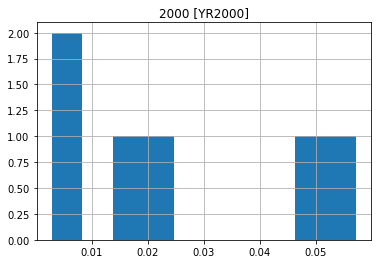

In [87]:
SA_broadband_without_2000.hist()

In [ ]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

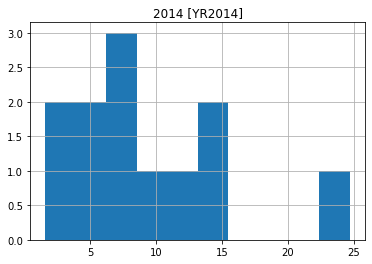

In [78]:
broadband1[broadband1.Region=="South America"].hist(column='2014 [YR2014]')

In [ ]:
#South America 2014 without outliers

In [88]:
SA_broadband_without_2014 = broadband1[broadband1.Region=="South America"]
SA_broadband_without_2014 = SA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,15.290428
23,Bolivia,South America,1.613811
26,Brazil,South America,11.820828
40,Chile,South America,14.019499
42,Colombia,South America,10.706497
57,Ecuador,South America,8.272569
83,Guyana,South America,5.924310
153,Paraguay,South America,2.805126
154,Peru,South America,5.872502
186,Suriname,South America,8.386457


In [89]:
upper, lower = outliers(SA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_broadband_without_2014 = SA_broadband_without_2014[(SA_broadband_without_2014["2014 [YR2014]"] > lower) & (SA_broadband_without_2014["2014 [YR2014]"] < upper)]
SA_broadband_without_2014

Upper whisker:  22.059200900875002
Lower Whisker:  -3.777347288125002


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,15.290428
23,Bolivia,South America,1.613811
26,Brazil,South America,11.820828
40,Chile,South America,14.019499
42,Colombia,South America,10.706497
57,Ecuador,South America,8.272569
83,Guyana,South America,5.924310
153,Paraguay,South America,2.805126
154,Peru,South America,5.872502
186,Suriname,South America,8.386457


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

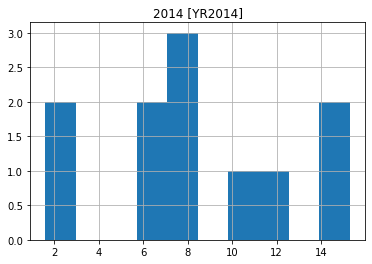

In [90]:
SA_broadband_without_2014.hist()

In [ ]:
#Western Asia 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

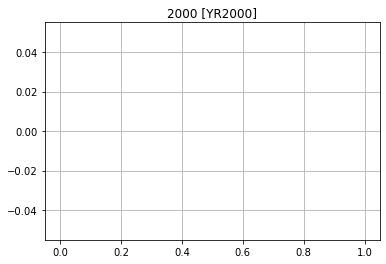

In [82]:
broadband1[broadband1.Region=="Western Asia"].hist(column='2000 [YR2000]')

In [ ]:
#Western Asia 2000 without outliers

In [95]:
WA_broadband_without_2000 = broadband1[broadband1.Region=="Western Asia"]
WA_broadband_without_2000 = WA_broadband_without_2000[["Country Name","Region","2000 [YR2000]"]]
WA_broadband_without_2000

,Country Name,Region,2000 [YR2000]
8,Armenia,Western Asia,NaN
12,Azerbaijan,Western Asia,NaN
72,Georgia,Western Asia,NaN
100,Kazakhstan,Western Asia,NaN
107,Kyrgyz Republic,Western Asia,NaN
190,Tajikistan,Western Asia,NaN
199,Turkmenistan,Western Asia,NaN
208,Uzbekistan,Western Asia,NaN


In [101]:
upper, lower = outliers(WA_broadband_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_broadband_without_2000 = WA_broadband_without_2000[(WA_broadband_without_2000["2000 [YR2000]"] > lower) & (WA_broadband_without_2000["2000 [YR2000]"] < upper)]
WA_broadband_without_2000

Upper whisker:  nan
Lower Whisker:  nan


,Country Name,Region,2000 [YR2000]


In [23]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

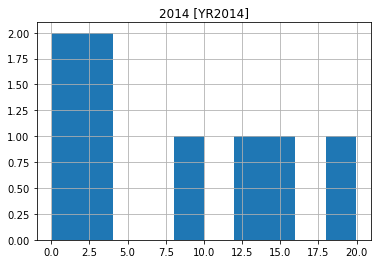

In [98]:
broadband1[broadband1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [ ]:
#Western Asia 2014 without outliers

In [99]:
WA_broadband_without_2014 = broadband1[broadband1.Region=="Western Asia"]
WA_broadband_without_2014 = WA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,9.369735
12,Azerbaijan,Western Asia,19.967867
72,Georgia,Western Asia,14.889212
100,Kazakhstan,Western Asia,12.414308
107,Kyrgyz Republic,Western Asia,2.920781
190,Tajikistan,Western Asia,0.073914
199,Turkmenistan,Western Asia,0.042076
208,Uzbekistan,Western Asia,2.696508


In [100]:
upper, lower = outliers(WA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_broadband_without_2014 = WA_broadband_without_2014[(WA_broadband_without_2014["2014 [YR2014]"] > lower) & (WA_broadband_without_2014["2014 [YR2014]"] < upper)]
WA_broadband_without_2014

Upper whisker:  29.52129642725
Lower Whisker:  -14.44740259875


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,9.369735
12,Azerbaijan,Western Asia,19.967867
72,Georgia,Western Asia,14.889212
100,Kazakhstan,Western Asia,12.414308
107,Kyrgyz Republic,Western Asia,2.920781
190,Tajikistan,Western Asia,0.073914
199,Turkmenistan,Western Asia,0.042076
208,Uzbekistan,Western Asia,2.696508


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

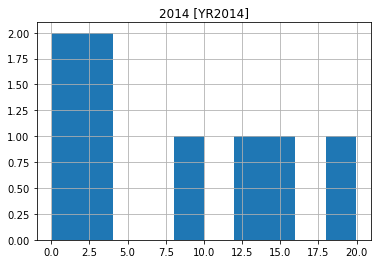

In [102]:
WA_broadband_without_2014.hist()

# GET DATA Electricity

In [104]:
electricity1 = pd.read_excel('infrastructure/electricity.xlsx')
electricity1.replace({'..':np.nan},inplace=True)
electricity1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,550.971960,559.917891,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
electricity1 = country.join(electricity1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
electricity1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Eastern Europe,0,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,0,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Australia and Oceanea,0,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Yemen, Rep.",Middle East,1,YEM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,125.619268,133.310280,134.242622,136.569517,...,193.803773,193.804024,250.963212,219.799897,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,Africa,1,ZMB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,761.865751,736.782955,735.740792,740.600918,...,631.738878,733.210611,747.058044,717.347305,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

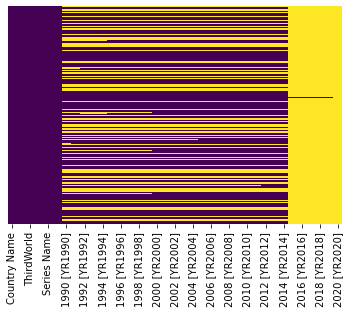

In [106]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
electricity1.drop(['2015 [YR2015]','2016 [YR2016]','2017 [YR2017]','2018 [YR2018]','2019 [YR2019]','2020 [YR2020]'],axis=1, inplace=True)
electricity1.head()

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
0,Afghanistan,South Asia,1,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Eastern Europe,0,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,...,1722.072850,1218.360146,1213.124369,1617.744156,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503
2,Algeria,Africa,0,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,...,890.625924,862.429594,894.284586,947.291328,866.307302,1016.636782,1123.332915,1237.966109,1278.915242,1362.871884
3,American Samoa,Australia and Oceanea,0,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#North America 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

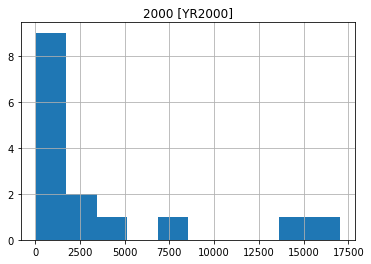

In [108]:
electricity1[electricity1.Region=="North America"].hist(column='2000 [YR2000]')

In [ ]:
#North America 2000 without outliers

In [109]:
NA_electricity_without_2000 = electricity1[electricity1.Region=="North America"]
NA_electricity_without_2000 = NA_electricity_without_2000[["Country Name","Region","2000 [YR2000]"]]
NA_electricity_without_2000

,Country Name,Region,2000 [YR2000]
6,Antigua and Barbuda,North America,NaN
9,Aruba,North America,NaN
13,"Bahamas, The",North America,NaN
16,Barbados,North America,NaN
19,Belize,North America,NaN
21,Bermuda,North America,NaN
27,British Virgin Islands,North America,NaN
35,Canada,North America,17037.072281
36,Cayman Islands,North America,NaN
39,Channel Islands,North America,NaN


In [111]:
upper, lower = outliers(NA_electricity_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_electricity_without_2000 = NA_electricity_without_2000[(NA_electricity_without_2000["2000 [YR2000]"] > lower) & (NA_electricity_without_2000["2000 [YR2000]"] < upper)]
NA_electricity_without_2000

Upper whisker:  7009.366920697618
Lower Whisker:  -3322.9094741157287


,Country Name,Region,2000 [YR2000]
46,Costa Rica,North America,1506.926791
49,Cuba,North America,1137.921864
56,Dominican Republic,North America,1327.774654
59,El Salvador,North America,614.986931
80,Guatemala,North America,332.189766
84,Haiti,North America,35.799514
85,Honduras,North America,488.401417
97,Jamaica,North America,2276.341791
127,Mexico,North America,1800.467938
142,Nicaragua,North America,344.820104


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

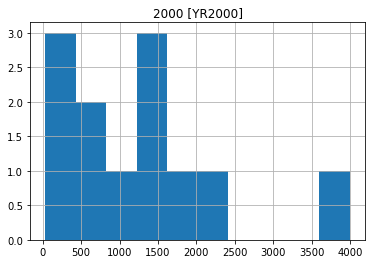

In [112]:
NA_electricity_without_2000.hist()

In [ ]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

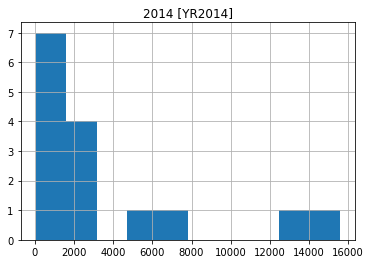

In [113]:
electricity1[electricity1.Region=="North America"].hist(column='2014 [YR2014]')

In [ ]:
#North America 2014 without outliers

In [114]:
NA_electricity_without_2014 = electricity1[electricity1.Region=="North America"]
NA_electricity_without_2014 = NA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,NaN
9,Aruba,North America,NaN
13,"Bahamas, The",North America,NaN
16,Barbados,North America,NaN
19,Belize,North America,NaN
21,Bermuda,North America,NaN
27,British Virgin Islands,North America,NaN
35,Canada,North America,15588.487146
36,Cayman Islands,North America,NaN
39,Channel Islands,North America,NaN


In [115]:
upper, lower = outliers(NA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_electricity_without_2014 = NA_electricity_without_2014[(NA_electricity_without_2014["2014 [YR2014]"] > lower) & (NA_electricity_without_2014["2014 [YR2014]"] < upper)]
NA_electricity_without_2014

Upper whisker:  7526.059109893906
Lower Whisker:  -3270.1062185208984


,Country Name,Region,2014 [YR2014]
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
50,Curacao,North America,4797.670436
56,Dominican Republic,North America,1615.514607
59,El Salvador,North America,937.074472
80,Guatemala,North America,601.189731
84,Haiti,North America,39.055809
85,Honduras,North America,619.837087
97,Jamaica,North America,1050.732539
127,Mexico,North America,2157.323788


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

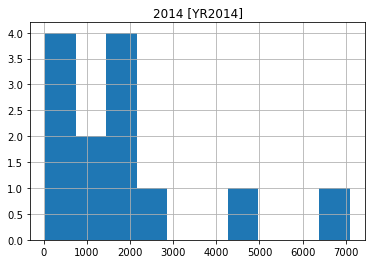

In [116]:
NA_electricity_without_2014.hist()

In [ ]:
#South America 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

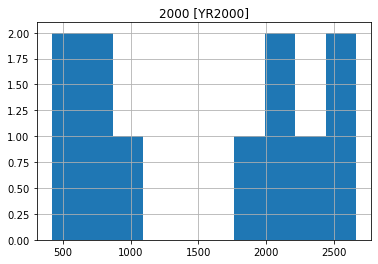

In [117]:
electricity1[electricity1.Region=="South America"].hist(column='2000 [YR2000]')

In [ ]:
#South America 2000 without outliers

In [118]:
SA_electricity_without_2000 = electricity1[electricity1.Region=="South America"]
SA_electricity_without_2000 = SA_electricity_without_2000[["Country Name","Region","2000 [YR2000]"]]
SA_electricity_without_2000

,Country Name,Region,2000 [YR2000]
7,Argentina,South America,2088.807630
23,Bolivia,South America,415.881173
26,Brazil,South America,1897.353148
40,Chile,South America,2499.291178
42,Colombia,South America,845.597517
57,Ecuador,South America,634.880681
83,Guyana,South America,NaN
153,Paraguay,South America,884.054372
154,Peru,South America,666.176769
186,Suriname,South America,2265.662159


In [119]:
upper, lower = outliers(SA_electricity_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_electricity_without_2000 = SA_electricity_without_2000[(SA_electricity_without_2000["2000 [YR2000]"] > lower) & (SA_electricity_without_2000["2000 [YR2000]"] < upper)]
SA_electricity_without_2000

Upper whisker:  4309.256522060252
Lower Whisker:  -1376.1344845482715


,Country Name,Region,2000 [YR2000]
7,Argentina,South America,2088.807630
23,Bolivia,South America,415.881173
26,Brazil,South America,1897.353148
40,Chile,South America,2499.291178
42,Colombia,South America,845.597517
57,Ecuador,South America,634.880681
153,Paraguay,South America,884.054372
154,Peru,South America,666.176769
186,Suriname,South America,2265.662159
207,Uruguay,South America,2031.186836


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

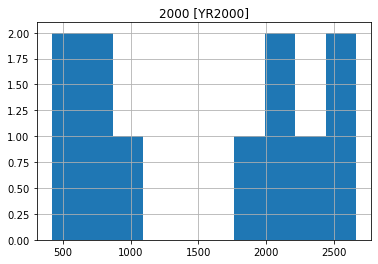

In [120]:
SA_electricity_without_2000.hist()

In [ ]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

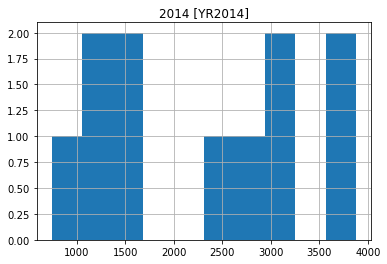

In [121]:
electricity1[electricity1.Region=="South America"].hist(column='2014 [YR2014]')

In [ ]:
#South America 2014 without outliers

In [122]:
SA_electricity_without_2014 = electricity1[electricity1.Region=="South America"]
SA_electricity_without_2014 = SA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
57,Ecuador,South America,1376.393633
83,Guyana,South America,NaN
153,Paraguay,South America,1552.384687
154,Peru,South America,1345.879007
186,Suriname,South America,3596.745217


In [123]:
upper, lower = outliers(SA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_electricity_without_2014 = SA_electricity_without_2014[(SA_electricity_without_2014["2014 [YR2014]"] > lower) & (SA_electricity_without_2014["2014 [YR2014]"] < upper)]
SA_electricity_without_2014

Upper whisker:  5658.16046141894
Lower Whisker:  -1217.0781644964432


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
57,Ecuador,South America,1376.393633
153,Paraguay,South America,1552.384687
154,Peru,South America,1345.879007
186,Suriname,South America,3596.745217
207,Uruguay,South America,3085.189883


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

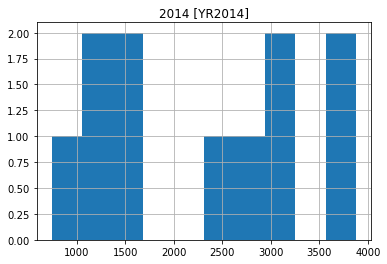

In [124]:
SA_electricity_without_2014.hist()

In [ ]:
#Western Asia 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

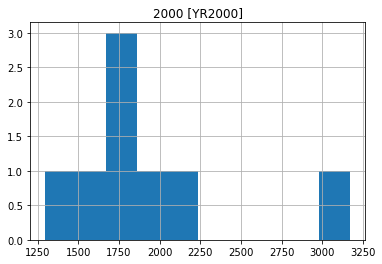

In [125]:
electricity1[electricity1.Region=="Western Asia"].hist(column='2000 [YR2000]')

In [ ]:
#Western Asia 2000 without outliers

In [126]:
WA_electricity_without_2000 = electricity1[electricity1.Region=="Western Asia"]
WA_electricity_without_2000 = WA_electricity_without_2000[["Country Name","Region","2000 [YR2000]"]]
WA_electricity_without_2000

,Country Name,Region,2000 [YR2000]
8,Armenia,Western Asia,1297.564469
12,Azerbaijan,Western Asia,2040.479090
72,Georgia,Western Asia,1574.391404
100,Kazakhstan,Western Asia,3169.523341
107,Kyrgyz Republic,Western Asia,1696.064021
190,Tajikistan,Western Asia,2161.565130
199,Turkmenistan,Western Asia,1692.157530
208,Uzbekistan,Western Asia,1780.457924


In [128]:
upper, lower = outliers(WA_electricity_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_electricity_without_2000 = WA_electricity_without_2000[(WA_electricity_without_2000["2000 [YR2000]"] > lower) & (WA_electricity_without_2000["2000 [YR2000]"] < upper)]
WA_electricity_without_2000

Upper whisker:  2682.802501421047
Lower Whisker:  1050.6640963712182


,Country Name,Region,2000 [YR2000]
8,Armenia,Western Asia,1297.564469
12,Azerbaijan,Western Asia,2040.479090
72,Georgia,Western Asia,1574.391404
107,Kyrgyz Republic,Western Asia,1696.064021
190,Tajikistan,Western Asia,2161.565130
199,Turkmenistan,Western Asia,1692.157530
208,Uzbekistan,Western Asia,1780.457924


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

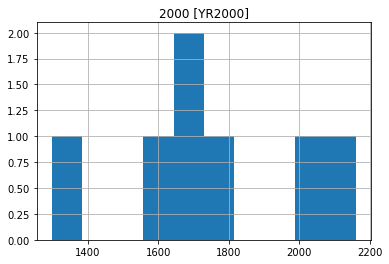

In [129]:
WA_electricity_without_2000.hist()

In [ ]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

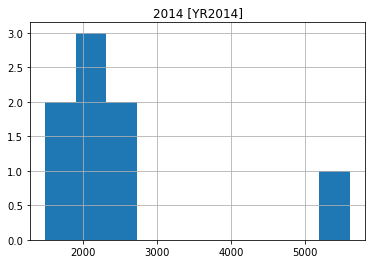

In [130]:
electricity1[electricity1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [ ]:
#Western Asia 2014 without outliers

In [131]:
WA_electricity_without_2014 = electricity1[electricity1.Region=="Western Asia"]
WA_electricity_without_2014 = WA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
72,Georgia,Western Asia,2693.972760
100,Kazakhstan,Western Asia,5600.208465
107,Kyrgyz Republic,Western Asia,1941.221832
190,Tajikistan,Western Asia,1499.485994
199,Turkmenistan,Western Asia,2678.765474
208,Uzbekistan,Western Asia,1645.441629


In [132]:
upper, lower = outliers(WA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_electricity_without_2014 = WA_electricity_without_2014[(WA_electricity_without_2014["2014 [YR2014]"] > lower) & (WA_electricity_without_2014["2014 [YR2014]"] < upper)]
WA_electricity_without_2014

Upper whisker:  3905.5030667364827
Lower Whisker:  644.3410099275495


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
72,Georgia,Western Asia,2693.972760
107,Kyrgyz Republic,Western Asia,1941.221832
190,Tajikistan,Western Asia,1499.485994
199,Turkmenistan,Western Asia,2678.765474
208,Uzbekistan,Western Asia,1645.441629


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

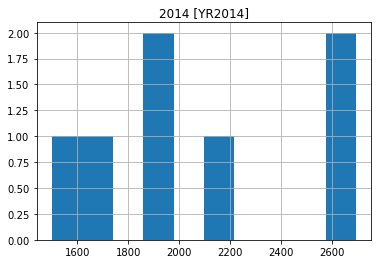

In [133]:
WA_electricity_without_2014.hist()

# GET DATA Mobile

In [134]:
mobile1 = pd.read_excel('infrastructure/mobile.xlsx')
mobile1.replace({'..':np.nan},inplace=True)
mobile1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,0.004778,0.016312,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,2.303484,2.351348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,1.250858,4.424432,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
mobile1 = country.join(mobile1[['Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]',
       '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]',
       '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']])
mobile1

,Country Name,Region,ThirdWorld,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,South Asia,1,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,Eastern Europe,0,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,Africa,0,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,Australia and Oceanea,0,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Western Europe,0,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,VIR,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,West Bank and Gaza,Middle East,0,PSE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,NaN,0.000000,0.000000,...,69.523085,73.904186,73.617539,72.201640,77.961373,80.100672,84.179796,89.975754,86.325385,83.658511
214,"Yemen, Rep.",Middle East,1,YEM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.011965,0.037920,...,49.009585,56.796874,66.984638,66.218793,56.691131,60.486341,55.175024,53.678933,NaN,NaN
215,Zambia,Africa,1,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,...,58.221742,72.758845,69.646403,65.681859,72.784572,73.438230,79.736910,89.157044,96.414412,103.917835


<AxesSubplot:>

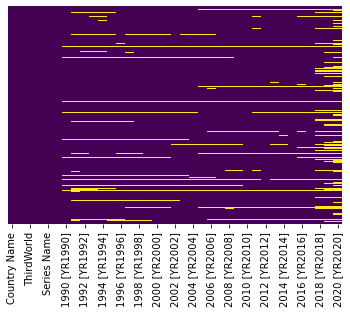

In [136]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#North America 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

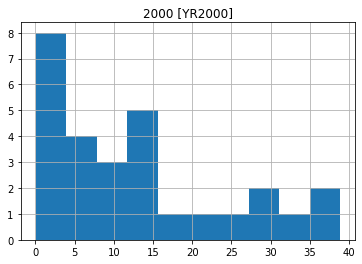

In [138]:
mobile1[mobile1.Region=="North America"].hist(column='2000 [YR2000]')

In [ ]:
#North America 2000 without outliers

In [139]:
NA_mobile_without_2000 = mobile1[mobile1.Region=="North America"]
NA_mobile_without_2000 = NA_mobile_without_2000[["Country Name","Region","2000 [YR2000]"]]
NA_mobile_without_2000

,Country Name,Region,2000 [YR2000]
6,Antigua and Barbuda,North America,28.941276
9,Aruba,North America,16.510187
13,"Bahamas, The",North America,10.576713
16,Barbados,North America,10.484504
19,Belize,North America,6.797808
21,Bermuda,North America,19.996308
27,British Virgin Islands,North America,NaN
35,Canada,North America,28.530439
36,Cayman Islands,North America,25.293714
39,Channel Islands,North America,NaN


In [140]:
upper, lower = outliers(NA_mobile_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_mobile_without_2000 = NA_mobile_without_2000[(NA_mobile_without_2000["2000 [YR2000]"] > lower) & (NA_mobile_without_2000["2000 [YR2000]"] < upper)]
NA_mobile_without_2000

Upper whisker:  39.505620421375
Lower Whisker:  -19.491454875625


,Country Name,Region,2000 [YR2000]
6,Antigua and Barbuda,North America,28.941276
9,Aruba,North America,16.510187
13,"Bahamas, The",North America,10.576713
16,Barbados,North America,10.484504
19,Belize,North America,6.797808
21,Bermuda,North America,19.996308
35,Canada,North America,28.530439
36,Cayman Islands,North America,25.293714
46,Costa Rica,North America,5.340589
49,Cuba,North America,0.058743


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

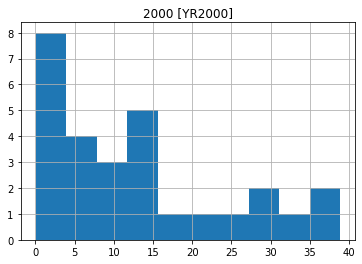

In [141]:
NA_mobile_without_2000.hist()

In [ ]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

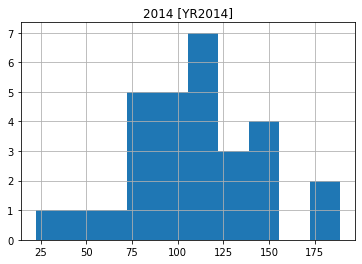

In [142]:
mobile1[mobile1.Region=="North America"].hist(column='2014 [YR2014]')

In [ ]:
#North America 2014 without outliers

In [144]:
NA_mobile_without_2014 = mobile1[mobile1.Region=="North America"]
NA_mobile_without_2014 = NA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,129.687129
9,Aruba,North America,134.619461
13,"Bahamas, The",North America,84.947104
16,Barbados,North America,107.243019
19,Belize,North America,48.759643
21,Bermuda,North America,92.906782
27,British Virgin Islands,North America,188.913036
35,Canada,North America,80.722095
36,Cayman Islands,North America,149.649947
39,Channel Islands,North America,NaN


In [145]:
upper, lower = outliers(NA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_mobile_without_2014 = NA_mobile_without_2014[(NA_mobile_without_2014["2014 [YR2014]"] > lower) & (NA_mobile_without_2014["2014 [YR2014]"] < upper)]
NA_mobile_without_2014

Upper whisker:  193.41948235999996
Lower Whisker:  23.466539000000026


,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,129.687129
9,Aruba,North America,134.619461
13,"Bahamas, The",North America,84.947104
16,Barbados,North America,107.243019
19,Belize,North America,48.759643
21,Bermuda,North America,92.906782
27,British Virgin Islands,North America,188.913036
35,Canada,North America,80.722095
36,Cayman Islands,North America,149.649947
46,Costa Rica,North America,146.399004


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

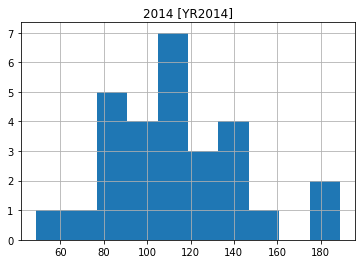

In [146]:
NA_mobile_without_2014.hist()

In [ ]:
#South America 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

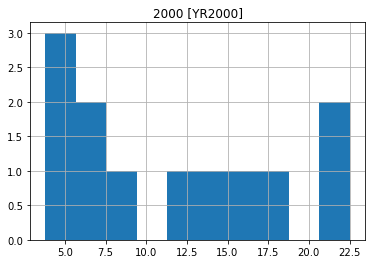

In [147]:
mobile1[mobile1.Region=="South America"].hist(column='2000 [YR2000]')

In [ ]:
#South America 2000 without outliers

In [148]:
SA_mobile_without_2000 = mobile1[mobile1.Region=="South America"]
SA_mobile_without_2000 = SA_mobile_without_2000[["Country Name","Region","2000 [YR2000]"]]
SA_mobile_without_2000

,Country Name,Region,2000 [YR2000]
7,Argentina,South America,17.596451
23,Bolivia,South America,6.920904
26,Brazil,South America,13.266277
40,Chile,South America,22.170817
42,Colombia,South America,5.694683
57,Ecuador,South America,3.802605
83,Guyana,South America,5.334030
153,Paraguay,South America,15.419482
154,Peru,South America,4.814285
186,Suriname,South America,8.716018


In [149]:
upper, lower = outliers(SA_mobile_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_mobile_without_2000 = SA_mobile_without_2000[(SA_mobile_without_2000["2000 [YR2000]"] > lower) & (SA_mobile_without_2000["2000 [YR2000]"] < upper)]
SA_mobile_without_2000

Upper whisker:  31.502530593875
Lower Whisker:  -9.934287023125002


,Country Name,Region,2000 [YR2000]
7,Argentina,South America,17.596451
23,Bolivia,South America,6.920904
26,Brazil,South America,13.266277
40,Chile,South America,22.170817
42,Colombia,South America,5.694683
57,Ecuador,South America,3.802605
83,Guyana,South America,5.334030
153,Paraguay,South America,15.419482
154,Peru,South America,4.814285
186,Suriname,South America,8.716018


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

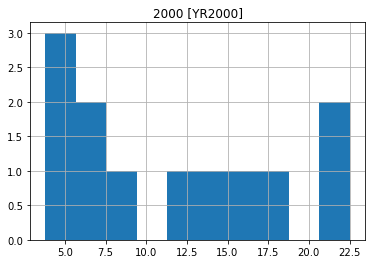

In [150]:
SA_mobile_without_2000.hist()

In [ ]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

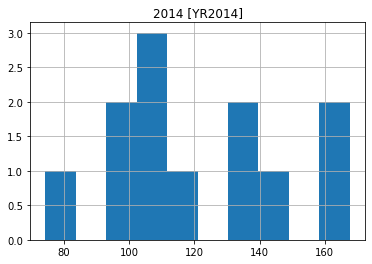

In [151]:
mobile1[mobile1.Region=="South America"].hist(column='2014 [YR2014]')

In [ ]:
#South America 2014 without outliers

In [152]:
SA_mobile_without_2014 = mobile1[mobile1.Region=="South America"]
SA_mobile_without_2014 = SA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
57,Ecuador,South America,104.099195
83,Guyana,South America,74.262490
153,Paraguay,South America,110.693965
154,Peru,South America,105.947699
186,Suriname,South America,167.692983


In [153]:
upper, lower = outliers(SA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_mobile_without_2014 = SA_mobile_without_2014[(SA_mobile_without_2014["2014 [YR2014]"] > lower) & (SA_mobile_without_2014["2014 [YR2014]"] < upper)]
SA_mobile_without_2014

Upper whisker:  194.13881896250004
Lower Whisker:  49.08155606249997


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
57,Ecuador,South America,104.099195
83,Guyana,South America,74.262490
153,Paraguay,South America,110.693965
154,Peru,South America,105.947699
186,Suriname,South America,167.692983


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

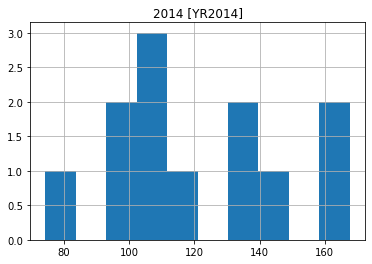

In [154]:
SA_mobile_without_2014.hist()

In [ ]:
#Western Asia 2000 with outliers

array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

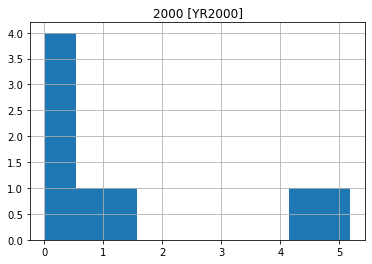

In [155]:
mobile1[mobile1.Region=="Western Asia"].hist(column='2000 [YR2000]')

In [ ]:
#Western Asia 2000 without outliers

In [156]:
WA_mobile_without_2000 = mobile1[mobile1.Region=="Western Asia"]
WA_mobile_without_2000 = WA_mobile_without_2000[["Country Name","Region","2000 [YR2000]"]]
WA_mobile_without_2000

,Country Name,Region,2000 [YR2000]
8,Armenia,Western Asia,0.569652
12,Azerbaijan,Western Asia,5.175593
72,Georgia,Western Asia,4.464297
100,Kazakhstan,Western Asia,1.322145
107,Kyrgyz Republic,Western Asia,0.182900
190,Tajikistan,Western Asia,0.018660
199,Turkmenistan,Western Asia,0.166071
208,Uzbekistan,Western Asia,0.214486


In [157]:
upper, lower = outliers(WA_mobile_without_2000, "2000 [YR2000]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_mobile_without_2000 = WA_mobile_without_2000[(WA_mobile_without_2000["2000 [YR2000]"] > lower) & (WA_mobile_without_2000["2000 [YR2000]"] < upper)]
WA_mobile_without_2000

Upper whisker:  5.00116831275
Lower Whisker:  -2.71479204125


,Country Name,Region,2000 [YR2000]
8,Armenia,Western Asia,0.569652
72,Georgia,Western Asia,4.464297
100,Kazakhstan,Western Asia,1.322145
107,Kyrgyz Republic,Western Asia,0.182900
190,Tajikistan,Western Asia,0.018660
199,Turkmenistan,Western Asia,0.166071
208,Uzbekistan,Western Asia,0.214486


array([[<AxesSubplot:title={'center':'2000 [YR2000]'}>]], dtype=object)

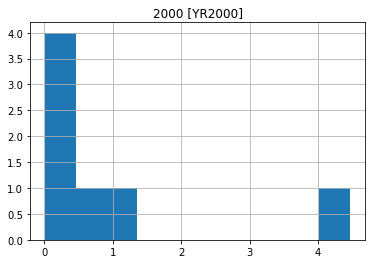

In [158]:
WA_mobile_without_2000.hist()

In [ ]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

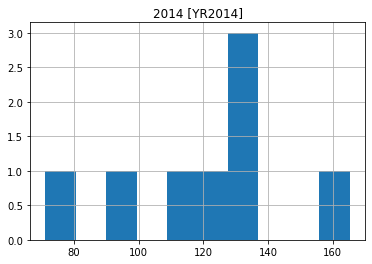

In [159]:
mobile1[mobile1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [ ]:
#Western Asia 2014 without outliers

In [160]:
WA_mobile_without_2014 = mobile1[mobile1.Region=="Western Asia"]
WA_mobile_without_2014 = WA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
72,Georgia,Western Asia,133.837665
100,Kazakhstan,Western Asia,165.267504
107,Kyrgyz Republic,Western Asia,129.410601
190,Tajikistan,Western Asia,96.925504
199,Turkmenistan,Western Asia,131.827069
208,Uzbekistan,Western Asia,71.119845


In [161]:
upper, lower = outliers(WA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_mobile_without_2014 = WA_mobile_without_2014[(WA_mobile_without_2014["2014 [YR2014]"] > lower) & (WA_mobile_without_2014["2014 [YR2014]"] < upper)]
WA_mobile_without_2014

Upper whisker:  169.58708725625
Lower Whisker:  70.23410290625


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
72,Georgia,Western Asia,133.837665
100,Kazakhstan,Western Asia,165.267504
107,Kyrgyz Republic,Western Asia,129.410601
190,Tajikistan,Western Asia,96.925504
199,Turkmenistan,Western Asia,131.827069
208,Uzbekistan,Western Asia,71.119845


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

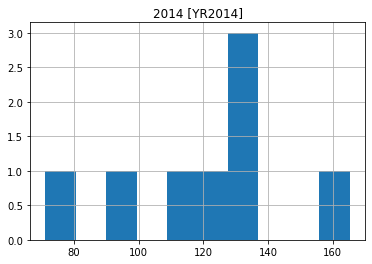

In [162]:
WA_mobile_without_2014.hist()